# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [30]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import numpy as np

from inauguralproject import HouseholdSpecializationModelClass
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [31]:
# code for solving the model (remember documentation and comments)

model = HouseholdSpecializationModelClass()

# Ecercise 1

a = [0.25, 0.50, 0.75]
s = [0.50, 1.0, 1.5]

print('The change of HF and HM depending on different alphas and sigmas', '\n')

for i in s:
    model.par.sigma = i
    for j in a:
        model.par.alpha = j
        opt = model.solve_discrete()
        HF = opt.HF
        HM = opt.HM
        HFdividedHM = opt.HF/opt.HM

        print(f"alpha={j:.2f}, sigma={i:.2f}  -->  HF={HF:.2f}, HM={HM:.2f}  -->  HF/HM={HFdividedHM:.2f}")

 
from tabulate import tabulate 

info = {
    '0.25': [3/5.5, 2/6.5, 1.5/7],
    '0.5' : [1, 1, 1],
    '0.75': [5.5/3, 6.5/2, 7/1.5]
}

print('\n', '\n', 'The illustration of the Ratio', '\n')

print(tabulate(info, headers = 'keys', tablefmt='fancy_grid', showindex=(0.5,1,1.5)))




The change of HF and HM depending on different alphas and sigmas 



/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes-1/inauguralproject/inauguralproject.py:80: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes-1/inauguralproject/inauguralproject.py:80: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes-1/inauguralproject/inauguralproject.py:85: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


alpha=0.25, sigma=0.50  -->  HF=3.00, HM=5.50  -->  HF/HM=0.55
alpha=0.50, sigma=0.50  -->  HF=4.50, HM=4.50  -->  HF/HM=1.00
alpha=0.75, sigma=0.50  -->  HF=5.50, HM=3.00  -->  HF/HM=1.83
alpha=0.25, sigma=1.00  -->  HF=2.00, HM=6.50  -->  HF/HM=0.31
alpha=0.50, sigma=1.00  -->  HF=4.50, HM=4.50  -->  HF/HM=1.00
alpha=0.75, sigma=1.00  -->  HF=6.50, HM=2.00  -->  HF/HM=3.25
alpha=0.25, sigma=1.50  -->  HF=1.50, HM=7.00  -->  HF/HM=0.21
alpha=0.50, sigma=1.50  -->  HF=4.50, HM=4.50  -->  HF/HM=1.00
alpha=0.75, sigma=1.50  -->  HF=7.00, HM=1.50  -->  HF/HM=4.67

 
 The illustration of the Ratio 

╒═════╤══════════╤═══════╤═════════╕
│     │     0.25 │   0.5 │    0.75 │
╞═════╪══════════╪═══════╪═════════╡
│ 0.5 │ 0.545455 │     1 │ 1.83333 │
├─────┼──────────┼───────┼─────────┤
│ 1   │ 0.307692 │     1 │ 3.25    │
├─────┼──────────┼───────┼─────────┤
│ 1.5 │ 0.214286 │     1 │ 4.66667 │
╘═════╧══════════╧═══════╧═════════╛


# Question 2

Explain your code and procedure

Kurpark_h: [0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
BWK_w: [-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


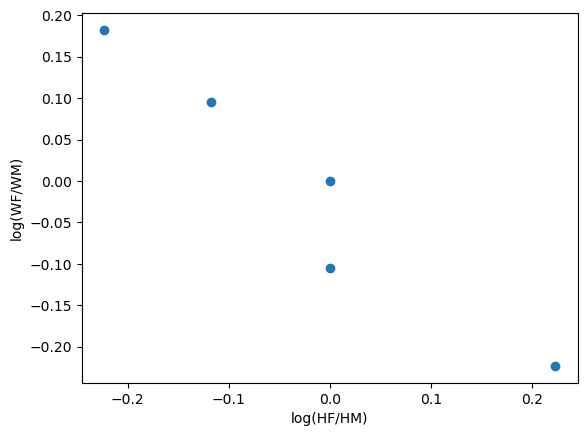

In [27]:
# code

import math
from matplotlib import pyplot as plt

model = HouseholdSpecializationModelClass()

w = [0.8, 0.9, 1, 1.1, 1.2]
Kurpark_h = []

for i in w:
    model.par.wF = i
    justus = model.solve_discrete()
    HF = justus.HF
    HM = justus.HM
    Kurpark_h.append(math.log(HF/HM))

BWK_w = []

for j in w:
    BWK_w.append(math.log(j/1))

print("Kurpark_h:", Kurpark_h)
print ("BWK_w:", BWK_w)


plt.scatter(Kurpark_h, BWK_w)
plt.ylabel("log(WF/WM)")
plt.xlabel("log(HF/HM)")
plt.show()


    

# Question 3

Explain your code and procedure

In [38]:
model = HouseholdSpecializationModelClass()

model.solve_continuously()


namespace(LM=4.454526956737588,
          HM=4.454486385710032,
          LF=4.454479205529973,
          HF=4.454493213890576)

Kurpark_h: [0.22314768475287364, 0.10536613895346768, 1.5328760083307037e-06, -0.5492980754247977, -0.5493035378995874]
BWK_w: [-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


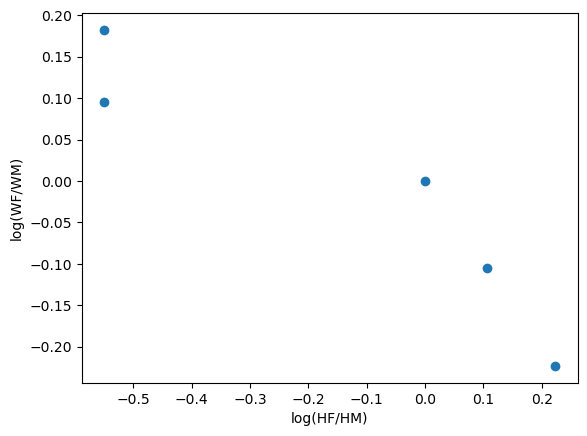

In [39]:
import math
from matplotlib import pyplot as plt

model = HouseholdSpecializationModelClass()

w = [0.8, 0.9, 1, 1.1, 1.2]
Kurpark_h = []

for i in w:
    model.par.wF = i
    justus = model.solve_continuously()
    HF = justus.HF
    HM = justus.HM
    Kurpark_h.append(math.log(HF/HM))

BWK_w = []

for j in w:
    BWK_w.append(math.log(j/1))

print("Kurpark_h:", Kurpark_h)
print ("BWK_w:", BWK_w)


plt.scatter(Kurpark_h, BWK_w)
plt.ylabel("log(WF/WM)")
plt.xlabel("log(HF/HM)")
plt.show()

ADD CONCISE CONLUSION.